# **Final Report - Data Science**
## Bachelor's Degree in Computer Science / PUCPR

**Prof. Jean Paul Barddal** / **Prof. Rayson Laroca**

`Arthur Przygocki` - `arthurprzygocki170403@gmail.com`

`Carlos Eduardo Rodrigues Mello` - `carlosrmelloo@gmail.com`

`Gabriel Yuichi Suzaki` - `yuichigabriel0@gmail.com`

`Henrique Tetilha Golias` - `henriquetetilha@gmail.com`

`Maria Julia Prado Lazaroto` - `mariajulialazaroto@gmail.com`

`2025`

# **Import the libs you need**

In [8]:
import pandas as pd
import numpy as np
import kagglehub
from kagglehub import KaggleDatasetAdapter
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# **Load your data**

Below, load the data using pandas and perform all necessary data cleansing to ensure that the data types are correct for further analysis.

In [4]:
file_path = "universal_top_spotify_songs.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "asaniczka/top-spotify-songs-in-73-countries-daily-updated",
  file_path,
)

C:\Users\henri\AppData\Local\Temp\ipykernel_23664\1735426109.py:3: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 431M/431M [01:29<00:00, 5.07MB/s] 


In [5]:
# clean and treat the data here
df['country']=df['country'].fillna('Global')
df.dropna(inplace=True)

In [13]:
# use as many code and text cells as needed
df

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",1,0,0,Global,2025-04-09,89,False,...,6,-7.727,0,0.0317,0.2890,0.000000,0.126,0.498,157.964,3
1,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,2,0,0,Global,2025-04-09,99,False,...,2,-10.171,1,0.0358,0.2000,0.060800,0.117,0.438,104.978,4
2,2RkZ5LkEzeHGRsmDqKwmaJ,Ordinary,Alex Warren,3,0,0,Global,2025-04-09,83,False,...,2,-6.141,1,0.0600,0.7040,0.000007,0.055,0.391,168.115,3
3,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"ROSÉ, Bruno Mars",4,0,0,Global,2025-04-09,92,False,...,0,-4.477,0,0.2600,0.0283,0.000000,0.355,0.939,149.027,4
4,2CGNAOSuO1MEFCbBRgUzjd,luther (with sza),"Kendrick Lamar, SZA",5,1,0,Global,2025-04-09,94,False,...,2,-7.546,1,0.1250,0.2510,0.000000,0.248,0.576,138.008,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912252,0AYt6NMyyLd0rLuvr0UkMH,Slime You Out (feat. SZA),"Drake, SZA",46,4,0,AE,2023-10-18,84,True,...,5,-9.243,0,0.0502,0.5080,0.000000,0.259,0.105,88.880,3
1912253,2Gk6fi0dqt91NKvlzGsmm7,SAY MY GRACE (feat. Travis Scott),"Offset, Travis Scott",47,3,0,AE,2023-10-18,80,True,...,10,-5.060,1,0.0452,0.0585,0.000000,0.132,0.476,121.879,4
1912254,26b3oVLrRUaaybJulow9kz,People,Libianca,48,2,0,AE,2023-10-18,88,False,...,10,-7.621,0,0.0678,0.5510,0.000013,0.102,0.693,124.357,5
1912255,5ydjxBSUIDn26MFzU3asP4,Rainy Days,V,49,1,0,AE,2023-10-18,88,False,...,9,-8.016,0,0.0875,0.7390,0.000000,0.148,0.282,74.828,4


# **Statistical Description**

In this section, you should report the key characteristics of the dataset, including but not limited to:
* Number of instances;
* Number of features;
* Number of classes;
* Class distribution.

### **Number of Instances**:

In [11]:
row_count = len(df)
print(f"Number of instances: {row_count}")

Number of instances: 1908657


### **25 Features**:

**spotify_id**: The unique identifier for the song in the Spotify database. `(str)`

**name**: The title of the song. `(str)`

**artists**: The name(s) of the artist(s) associated with the song. `(str)`

**daily_rank**: The daily rank of the song in the top 50 list. `(int)`

**daily_movement**: The change in rankings compared to the previous day. `(int)`

**weekly_movement**: The change in rankings compared to the previous week. `(int)`

**country**: The ISO code of the country of the Top 50 Playlist. If Null, then the playlist if 'Global Top 50'. `(str)`

**snapshot_date**: The date on which the data was collected from the Spotify. `(str)`

**popularity**: A measure of the song's current popularity on Spotify. `(int)`

**is_explicit**: Indicates whether the song contains explicit lyrics. `(bool)`

**duration_ms**: The duration of the song in milliseconds. `(int)`

**album_name**: The title of the album the song belongs to. `(str)`

**album_release_date**: The release date of the album the song belongs to. `(str)`

**danceability**: A measure of how suitable the song is for dancing based on various musical elements. `(float)`

**energy**: A measure of the intensity and activity level of the song. `(float)`

**key**: The key of the song. `(int)`

**loudness**: The overall loudness of the song in decibels. `(float)`

**mode**: Indicates whether the song is in a major or minor key. `(int)`

**speechiness**: A measure of the presence of spoken words in the song. `(float)`

**acousticness**: A measure of the acoustic quality of the song. `(float)`

**instrumentalness**: A measure of the likelihood that the song does not contain vocals. `(float)`

**liveness**: A measure of the presence of a live audience in the recording. `(float)`

**valence**: A measure of the musical positiveness conveyed by the song. `(float)`

**tempo**: The tempo of the song in beats per minute. `(float)`

**time_signature**: The estimated overall time signature of the song. `(int)`

# **Univariate data analysis**

In this section, you should perform univariate data analysis on at least **20 variables**.

In the end, you should describe the main variables that are of your interest, and these should be accounted for in the next sections of the report.
The definition of each variable chosen should be clarified, so arbitrary selections are **not** accepted at this point.

For each variable plotted, make sure you determine the following:
1. The distribution of the data (Gaussian, binomial, exponential, etc.);
2. Skewness;
3. Kurtosis;
4. Mean, standard deviation, and what they stand for in the context of the dataset.

Ensure that each variable is **plotted correctly** based on its type. For instance, make sure scatterplots are not used for categorical data and so forth.

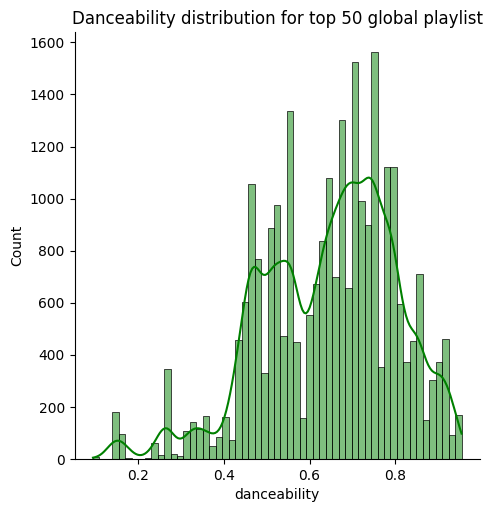

In [9]:
# how is danceability of this songs
data_global = df[df['country']=='Global'].dropna()
sns.displot(data=data_global, x="danceability",kde=True,color='green')
plt.title('Danceability distribution for top 50 global playlist')
plt.show()

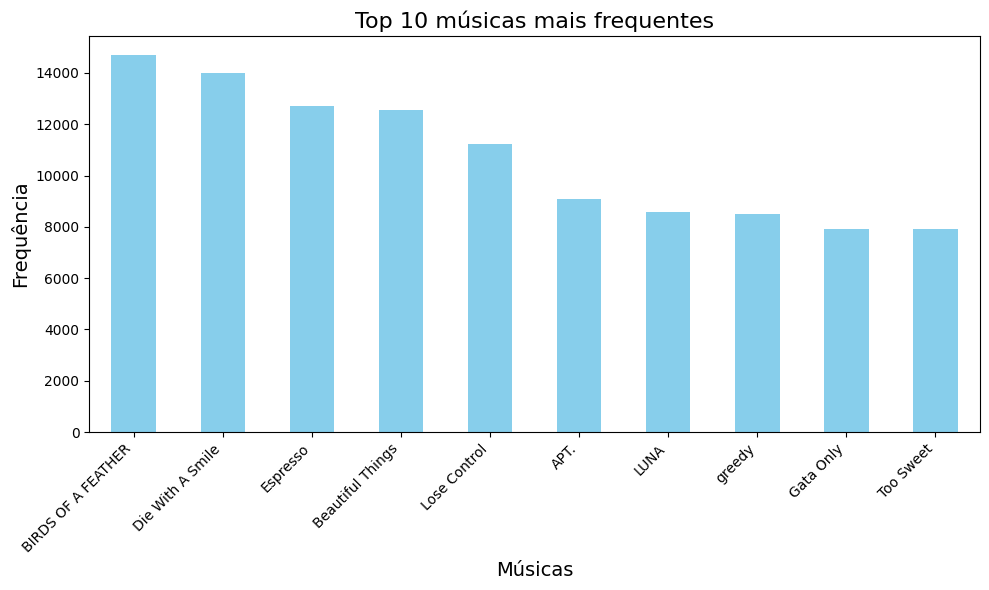

In [16]:
# Contar as ocorrências de cada música na coluna 'name'
top_10_songs = df['name'].value_counts().head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
top_10_songs.plot(kind='bar', color='skyblue')
plt.title('Top 10 músicas mais frequentes', fontsize=16)
plt.xlabel('Músicas', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

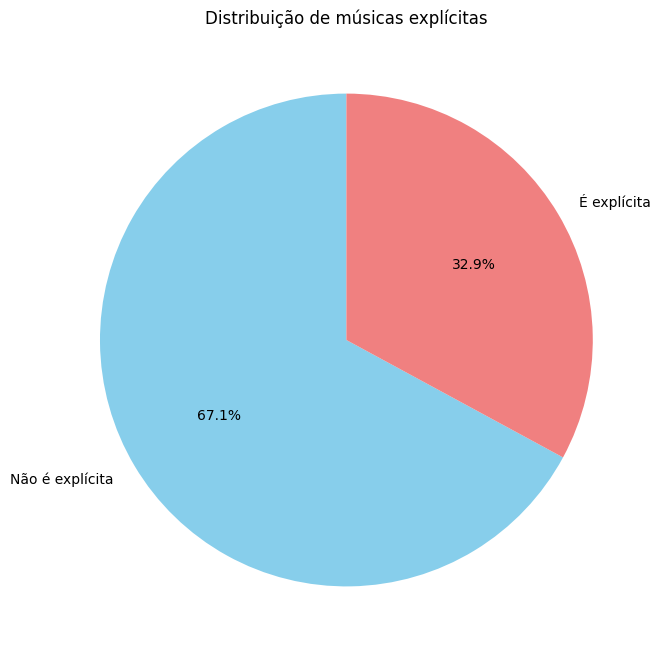

In [18]:
# Contar os valores da coluna 'is_explicit'
explicit_counts = df['is_explicit'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
explicit_counts.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['skyblue', 'lightcoral'], 
    labels=['Não é explícita', 'É explícita']
)
plt.title('Distribuição de músicas explícitas')
plt.ylabel('')  # Remove o rótulo do eixo y
plt.show()

In [ ]:
# Filtrar linhas onde um artista aparece na coluna 'artists'
bmth_songs = df[df['artists'].str.contains("", case=False, na=False)]
bmth_songs

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
264,3AdXwuFn7j21HNiFMXvZXt,Caramel,Sleep Token,15,-4,35,US,2025-04-09,82,False,...,5,-5.385,0,0.0331,0.00432,0.000009,0.0610,0.290,94.010,4
3860,3AdXwuFn7j21HNiFMXvZXt,Caramel,Sleep Token,11,2,39,US,2025-04-08,80,False,...,5,-5.385,0,0.0331,0.00432,0.000009,0.0610,0.290,94.010,4
7040,3AdXwuFn7j21HNiFMXvZXt,Caramel,Sleep Token,41,-1,9,AU,2025-04-08,80,False,...,5,-5.385,0,0.0331,0.00432,0.000009,0.0610,0.290,94.010,4
7462,3AdXwuFn7j21HNiFMXvZXt,Caramel,Sleep Token,13,-4,37,US,2025-04-07,79,False,...,5,-5.385,0,0.0331,0.00432,0.000009,0.0610,0.290,94.010,4
10632,3AdXwuFn7j21HNiFMXvZXt,Caramel,Sleep Token,40,4,10,AU,2025-04-07,79,False,...,5,-5.385,0,0.0331,0.00432,0.000009,0.0610,0.290,94.010,4
11051,3AdXwuFn7j21HNiFMXvZXt,Caramel,Sleep Token,9,41,41,US,2025-04-06,75,False,...,5,-5.385,0,0.0331,0.00432,0.000009,0.0610,0.290,94.010,4
13940,3AdXwuFn7j21HNiFMXvZXt,Caramel,Sleep Token,48,2,2,CA,2025-04-06,75,False,...,5,-5.385,0,0.0331,0.00432,0.000009,0.0610,0.290,94.010,4
14236,3AdXwuFn7j21HNiFMXvZXt,Caramel,Sleep Token,44,6,6,AU,2025-04-06,75,False,...,5,-5.385,0,0.0331,0.00432,0.000009,0.0610,0.290,94.010,4
68720,5NRpxJxtR6JkUhQS4F0um6,Emergence,Sleep Token,39,-10,-28,US,2025-03-21,82,False,...,4,-6.729,0,0.0350,0.02250,0.000076,0.0826,0.162,126.106,4
72310,5NRpxJxtR6JkUhQS4F0um6,Emergence,Sleep Token,29,1,21,US,2025-03-20,81,False,...,4,-6.729,0,0.0350,0.02250,0.000076,0.0826,0.162,126.106,4


# **Multivariate data analysis**

In this section, you should plot at least **5 multivariate visualizations**. The key here is to investigate underlying correlations and behaviors within the dataset.
Naturally, as visualizations are being created, we should end up with obvious results, yet, you should find at least **ONE** non-obvious behavior in the data.

Please follow these steps for creating your visualizations:
1. State an hypothesis. Explain why you have selected these specific variables and what you expect to discover through their relationship;
2. Determine what kind of visualization is the most suitable;
3. Report the findings and discuss whether they corroborate or not the aforementioned hypothesis.


### Hints

In this section, make sure you go beyond naive explorations. For example, consider applying techniques such as PCA, t-SNE, or even others that we haven't covered in the lectures. The goal is to cultivate a critical mindset toward data analysis and our work.

### Important

It is strictly prohibited to create multivariate visualizations using variables that were not included in the previous section (univariate data analysis).

In [ ]:
# again, feel free to place as many cells to plot the visualizations,
# as well as describe to the main findings

# **Final Plots (Effective Data Visualization)**

In this section, you need to **enhance 3 multivariate visualizations** that were presented in the previous section of the report.
The goal is to enhance these visualizations so that they can be effectively presented to an audience unfamiliar with the dataset or with data analysis.
**Therefore, make sure that their size, colors, textures, and other visual elements are appropriate and convey the intended information to the audience.**

For your final plots, make sure you follow these steps:
1. Present the plot;
2. Provide a description of the visualization, highlighting the key findings that can be drawn from it.


**Hint**: take a look at the checklist based on Evergreen’s work to ensure your visualizations meet the best practices for clarity and impact.

In [ ]:
# your code goes here

# **Digest**

In this section you should write down the main findings of this exploratory data analysis. Furthermore, you should provide a reflection about your own work and effort during the module, highlighting what you believe you have done well and what you should have done differently. This digest should have at least 2,500 characters (excluding spaces).

```
Add your text here.
```

# **Machine Learning (**post checkpoint!**)**

In this section, you must create at least **3 machine learning models** for the task at hand. Depending on the problem's nature, you must select from classification, regression, or clustering models.
It is also important that you:
* Select **an appropriate validation protocol**, providing a rationale for why it is appropriate for this specific task;
* Choose **a suitable set of evaluation metrics**, providing an explanation for each and describing how it contributes to evaluating the model's performance in the context of this specific task.

In [ ]:
# use as many cells as needed

# **Final Steps (Submission)**


1. Save this report as a Jupyter Notebook (`.ipynb`);
2. Export a copy of the report as a PDF file (`.pdf`);
3. Copy the dataset;
4. Compress all the files (the Jupyter Notebook, PDF, and dataset) into a single ZIP archive (`<your_team_name>.zip`);
5. Upload the ZIP file to AVA.